In [53]:
# 0. Przygotowanie danych

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Wczytanie danych
df = pd.read_csv('procesory.csv')
print(df.to_string())



    Marka             Model  HT  Rdzenie  Wątki  Cache L1  Cache L2  Cache L3  Zegar bazowy (GHz)  Zegar boost (GHz)
0   Intel     Core i5-9600K   0        6      6       384       1.5         9                 3.7                4.6
1   Intel     Core i7-9700K   0        8      8       512       2.0        12                 3.6                4.9
2   Intel     Core i9-9900K   1        8     16       512       2.0        16                 3.6                5.0
3   Intel    Core i5-10600K   1        6     12       384       1.5        12                 4.1                4.8
4   Intel    Core i7-10700K   1        8     16       512       2.0        16                 3.8                5.1
5   Intel    Core i9-10900K   1       10     20       640       2.5        20                 3.7                5.3
6   Intel    Core i5-11600K   1        6     12       384       3.0        12                 3.9                4.9
7   Intel    Core i7-11700K   1        8     16       512       

In [55]:
# Wybór cech numerycznych do analizy
numeryczne_kolumny = ['HT', 'Rdzenie', 'Wątki', 'Cache L1', 'Cache L2', 'Cache L3', 'Zegar bazowy (GHz)']
df[['Cache L1', 'Cache L2', 'Cache L3']] = df[['Cache L1', 'Cache L2', 'Cache L3']].replace(' MB', '', regex=True).astype(float)

# Sprawdzenie brakujących wartości i uzupełnienie ich średnimi
if df[numeryczne_kolumny].isnull().sum().any():
    df[numeryczne_kolumny] = df[numeryczne_kolumny].fillna(df[numeryczne_kolumny].mean())

# Definicja cech (X) i wartości docelowej (y)
X = df[numeryczne_kolumny]
y = df['Zegar boost (GHz)']

# Podział na zbiór treningowy i testowy
X_treningowe, X_testowe, y_treningowe, y_testowe = train_test_split(X, y, test_size=0.2, random_state=42)

# Liniowa regresja
lr = LinearRegression()
lr.fit(X_treningowe, y_treningowe)
y_przewidywane_lr = lr.predict(X_testowe)
mse_lr = mean_squared_error(y_testowe, y_przewidywane_lr)

# Regresja Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_treningowe, y_treningowe)
y_przewidywane_ridge = ridge.predict(X_testowe)
mse_ridge = mean_squared_error(y_testowe, y_przewidywane_ridge)

# Sieć neuronowa
siec_neuronowa = MLPRegressor(hidden_layer_sizes=(10,), max_iter=500, random_state=42)
siec_neuronowa.fit(X_treningowe, y_treningowe)
y_przewidywane_siec_neuronowa = siec_neuronowa.predict(X_testowe)
mse_siec_neuronowa = mean_squared_error(y_testowe, y_przewidywane_siec_neuronowa)

# Wyniki
print(f"Regresja liniowa MSE: {mse_lr}")
print(f"Regresja Ridge MSE: {mse_ridge}")
print(f"Sieć Neuronowa MSE: {mse_siec_neuronowa}")


Regresja liniowa MSE: 0.1372718296056184
Regresja Ridge MSE: 0.10572016293326525
Sieć Neuronowa MSE: 23.127786419331983


C:\Hubert\Programy\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
# 2. Zbadaj wpływ zmiennych objaśniających na predykcję (analiza ważności cech w Ridge).

from sklearn.linear_model import Ridge
import numpy as np

model_ridge = Ridge(alpha=1.0)  # Możesz dostosować wartość alpha
model_ridge.fit(X_treningowe, y_treningowe)  # Dopasowanie modelu do danych treningowych
waznosci = model_ridge.coef_  # Współczynniki ważności cech
nazwy_cech = X.columns

# Wypisanie ważności cech
for feature, waznosc in zip(nazwy_cech, waznosci): 
    print(f'Cecha: {feature}, ważność: {waznosc}')  # Wyniki ważności cech

# Predykcja na zbiorze testowym
y_przewidywane_ridge = model_ridge.predict(X_testowe)  
mse_ridge = np.mean((y_testowe - y_przewidywane_ridge)**2)  # Obliczenie MSE
print(f"Regresja Ridge MSE: {mse_ridge}")

Cecha: HT, ważność: 0.10713334012991896
Cecha: Rdzenie, ważność: 0.26058991170363016
Cecha: Wątki, ważność: -0.03648659326375331
Cecha: Cache L1, ważność: -0.0014705934913741671
Cecha: Cache L2, ważność: -0.011273933273744265
Cecha: Cache L3, ważność: -0.002232405384124981
Cecha: Zegar bazowy (GHz), ważność: 0.5346284890367008
Regresja Ridge MSE: 0.10572016293326525


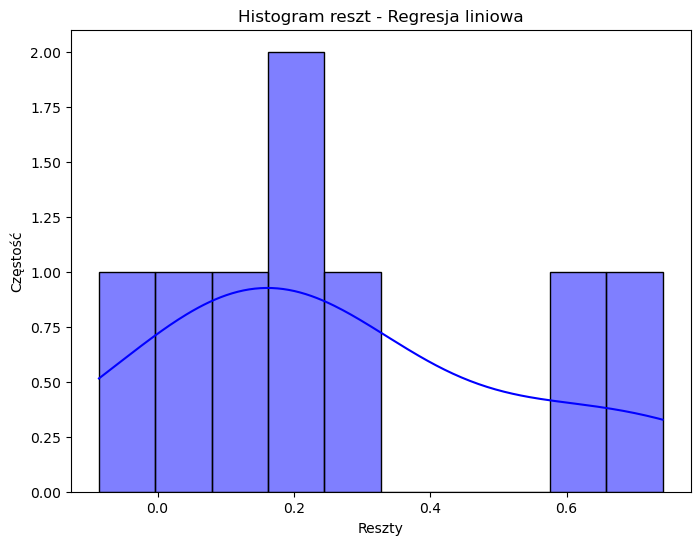

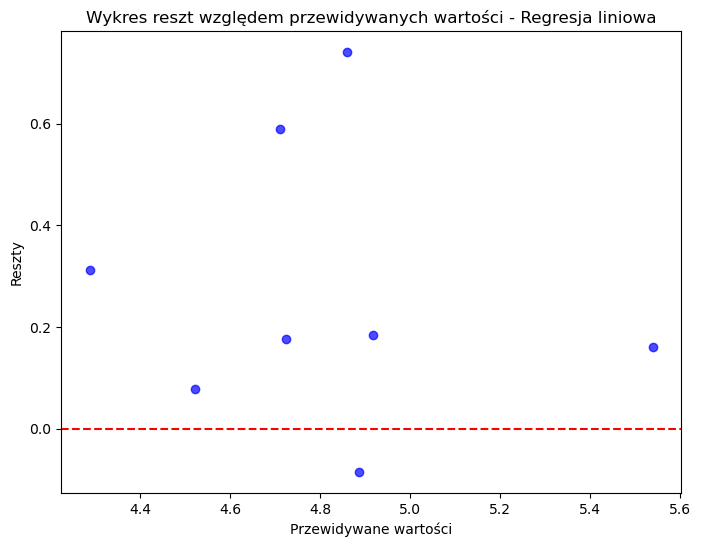

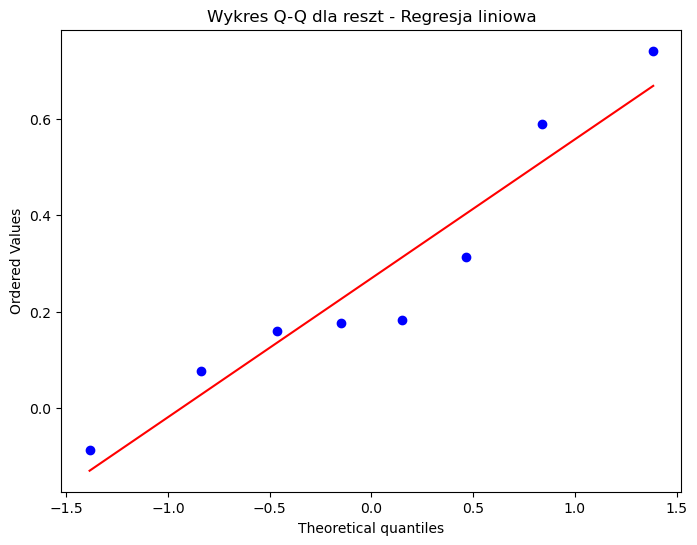

Mean Squared Error (MSE) dla regresji liniowej: 0.14


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

# 3. Wykonaj analizę reszt dla modelu regresji liniowej.

# Obliczenie reszt
reszty = y_testowe - y_przewidywane_lr

# Histogram reszt
plt.figure(figsize=(8, 6))
sns.histplot(reszty, kde=True, bins=10, color='blue')
plt.title('Histogram reszt - Regresja liniowa')
plt.xlabel('Reszty')
plt.ylabel('Częstość')
plt.show()

# Wykres reszt względem przewidywanych wartości
plt.figure(figsize=(8, 6))
plt.scatter(y_przewidywane_lr, reszty, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Wykres reszt względem przewidywanych wartości - Regresja liniowa')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')
plt.show()

# Normalność reszt - wykres Q-Q
plt.figure(figsize=(8, 6))
probplot(reszty, dist="norm", plot=plt)
plt.title('Wykres Q-Q dla reszt - Regresja liniowa')
plt.show()

# Średnia kwadratowa błędu (MSE) dla modelu regresji liniowej
print(f"Mean Squared Error (MSE) dla regresji liniowej: {mse_lr:.2f}")

In [67]:
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

# 3.1. Sprawdzenie normalności reszt (Shapiro-Wilk)
shapiro_test_stat, shapiro_p_value = shapiro(reszty)
print("Test Shapiro-Wilka dla normalności reszt:")
print(f"Statystyka testowa: {shapiro_test_stat:.4f}, p-wartość: {shapiro_p_value:.4e}")

if shapiro_p_value > 0.05:
    print("Brak podstaw do odrzucenia hipotezy zerowej: reszty są normalnie rozłożone.")
else:
    print("Odrzucenie hipotezy zerowej: reszty nie są normalnie rozłożone.")

# 3.2. Test autokorelacji reszt (Durbin-Watson)
durbin_watson_stat = durbin_watson(reszty)
print("\nTest Durbin-Watson:")
print(f"Statystyka Durbin-Watson: {durbin_watson_stat:.4f}")

# Interpretacja wyników testu Durbin-Watson
if durbin_watson_stat < 1.5:
    print("Wskazanie na autokorelację dodatnią reszt.")
elif durbin_watson_stat > 2.5:
    print("Wskazanie na autokorelację ujemną reszt.")
else:
    print("Brak istotnej autokorelacji reszt.")

Test Shapiro-Wilka dla normalności reszt:
Statystyka testowa: 0.9175, p-wartość: 4.1007e-01
Brak podstaw do odrzucenia hipotezy zerowej: reszty są normalnie rozłożone.

Test Durbin-Watson:
Statystyka Durbin-Watson: 1.4322
Wskazanie na autokorelację dodatnią reszt.


Test Shapiro-Wilka dla normalności reszt:
Statystyka testowa: 0.9175, p-wartość: 4.1007e-01
Brak podstaw do odrzucenia hipotezy zerowej: reszty są normalnie rozłożone.

Test Durbin-Watson:
Statystyka Durbin-Watson: 1.4322
Wskazanie na autokorelację dodatnią reszt.


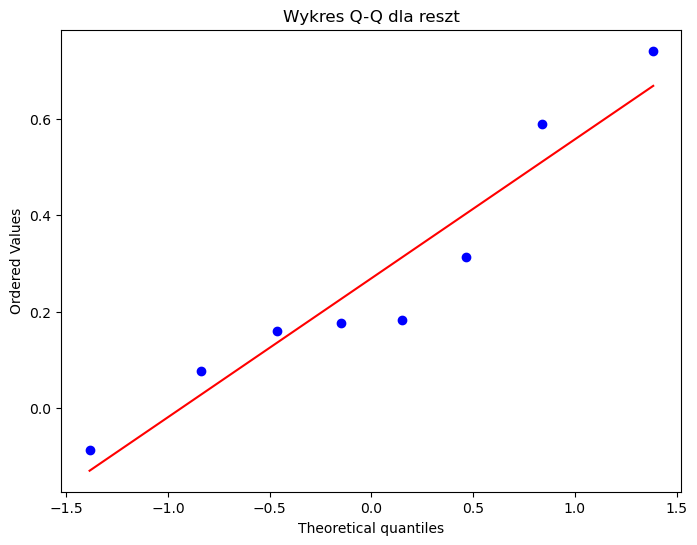

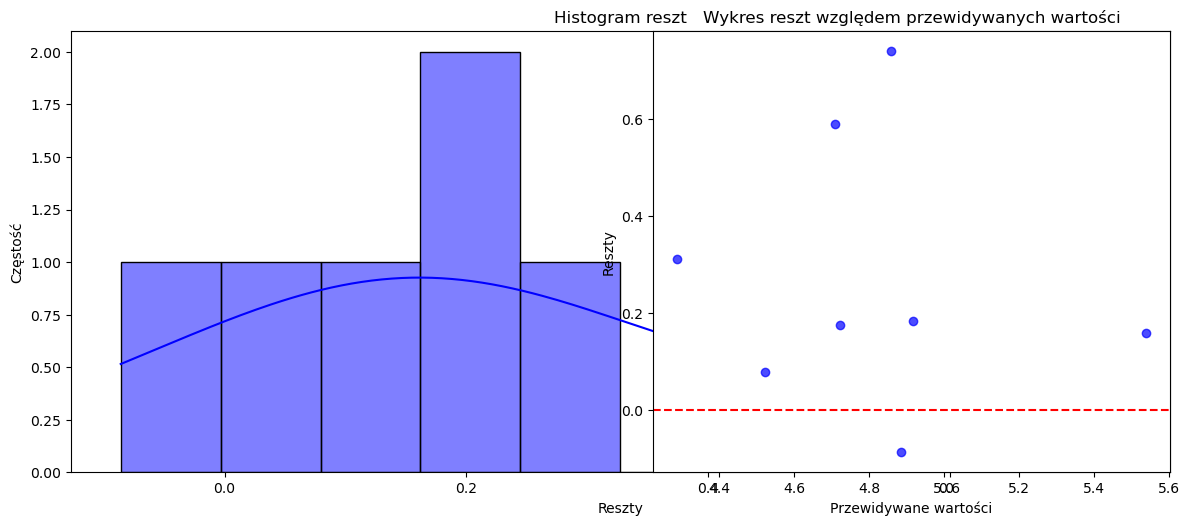

Mean Squared Error (MSE) dla regresji liniowej: 0.14


In [71]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot
from statsmodels.stats.stattools import durbin_watson

# 3.1. Sprawdzenie normalności reszt (Shapiro-Wilk)
shapiro_test_stat, shapiro_p_value = shapiro(reszty)
print("Test Shapiro-Wilka dla normalności reszt:")
print(f"Statystyka testowa: {shapiro_test_stat:.4f}, p-wartość: {shapiro_p_value:.4e}")

if shapiro_p_value > 0.05:
    print("Brak podstaw do odrzucenia hipotezy zerowej: reszty są normalnie rozłożone.")
else:
    print("Odrzucenie hipotezy zerowej: reszty nie są normalnie rozłożone.")

# 3.2. Test autokorelacji reszt (Durbin-Watson)
durbin_watson_stat = durbin_watson(reszty)
print("\nTest Durbin-Watson:")
print(f"Statystyka Durbin-Watson: {durbin_watson_stat:.4f}")

# Interpretacja wyników testu Durbin-Watson
if durbin_watson_stat < 1.5:
    print("Wskazanie na autokorelację dodatnią reszt.")
elif durbin_watson_stat > 2.5:
    print("Wskazanie na autokorelację ujemną reszt.")
else:
    print("Brak istotnej autokorelacji reszt.")

# 3.3. Normalność reszt - wykres Q-Q
plt.figure(figsize=(8, 6))
probplot(reszty, dist="norm", plot=plt)
plt.title('Wykres Q-Q dla reszt')
plt.show()

# 3.4. Histogram reszt oraz średnia kwadratowa błędu (MSE)
plt.figure(figsize=(12, 6))

# Histogram reszt
sns.histplot(reszty, kde=True, bins=10, color='blue')
plt.title('Histogram reszt')
plt.xlabel('Reszty')
plt.ylabel('Częstość')
plt.subplot(1, 2, 2)  # Podział okna na dwie części

# Średnia kwadratowa błędu (MSE)
plt.scatter(y_przewidywane_lr, reszty, alpha=0.7, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Wykres reszt względem przewidywanych wartości')
plt.xlabel('Przewidywane wartości')
plt.ylabel('Reszty')

plt.tight_layout()
plt.show()

# 3.5. Średnia kwadratowa błędu (MSE) dla modelu regresji liniowej
print(f"Mean Squared Error (MSE) dla regresji liniowej: {mse_lr:.2f}")